# Fashion Clothing Classifier Using CNN
## Problem Statement
Convolutional neural network (CNN) (Any One from the following)
1. Use any dataset of plant disease and design a plant disease detection system using CNN.
2. Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

In [1]:
!pip install openml

     ---------------------------------------- 0.0/144.5 kB ? eta -:--:--
     ----- ---------------------------------- 20.5/144.5 kB ? eta -:--:--
     ------------------ ------------------ 71.7/144.5 kB 787.7 kB/s eta 0:00:01
     -------------------------------- ----- 122.9/144.5 kB 1.0 MB/s eta 0:00:01
     ------------------------------------ 144.5/144.5 kB 780.5 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/93.5 kB ? eta -:--:--
   --


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from openml.datasets import get_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
fashion_mnist = get_dataset('Fashion-MNIST')

C:\Users\hp\AppData\Local\Temp\ipykernel_46548\2939029955.py:1: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  fashion_mnist = get_dataset('Fashion-MNIST')


KeyboardInterrupt: 

In [ ]:
fashion_mnist

In [ ]:
x, y, _, _ = fashion_mnist.get_data()

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist_fashion = fetch_openml('FASHION-MNIST', cache=True)

In [ ]:
mnist_fashion.keys()

In [ ]:
mnist_fashion['data']

In [ ]:
mnist_fashion['target']

In [ ]:
mnist_fashion['frame']

In [ ]:
print(mnist_fashion['DESCR'])

In [ ]:
x = mnist_fashion['data']
y = mnist_fashion['target']
x.shape, y.shape

In [ ]:
categories =   ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
# Visvualizing the images
plt.rcParams['figure.figsize']=(15,5)
plt.rcParams['figure.dpi']=100
digits = y.unique()
digits = [int(x) for x in digits]
digits.sort()
print(digits)

In [ ]:
for i in digits:
  plt.subplot(2,5, i+1)
  plt.imshow(x[y==str(i)].iloc[0].to_numpy().reshape(28,28))
  plt.title(categories[i])

plt.tight_layout()

In [ ]:
y = y.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x/255, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, x_test.shape

# Building neural network model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [ ]:
def get_model():
  model = Sequential()
  model.add(Flatten(input_shape=(x.shape[1],)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
model = get_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59850 (233.79 KB)
Trainable params: 59850 (233.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
(784*64+64, 64*128+128, 128*10+10)

(50240, 8320, 1290)

In [ ]:
model.layers

In [ ]:
model.layers[0].name

'flatten'

In [ ]:
model.layers[0].get_weights()

[]

In [ ]:
model.layers[1].get_weights()

[array([[ 0.0478598 ,  0.0571354 ,  0.07277379, ..., -0.07721826,
         -0.04453189,  0.08149374],
        [-0.08201338, -0.04584233,  0.05000996, ..., -0.02753346,
          0.07962593, -0.00943918],
        [-0.03414705, -0.00396946, -0.02738969, ..., -0.00493849,
          0.00668398, -0.07747798],
        ...,
        [ 0.05305124, -0.05102988,  0.08216483, ...,  0.04063457,
         -0.0367298 ,  0.0838049 ],
        [ 0.06166878,  0.00416131, -0.0046997 , ..., -0.07054811,
          0.01878045,  0.03636344],
        [ 0.07151829, -0.00053921, -0.05207587, ..., -0.05022456,
          0.0260812 , -0.03107857]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [ ]:
weight1 = model.layers[1].get_weights()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train

3095     5
46812    0
35560    6
35129    9
26077    7
        ..
48880    8
60051    4
50180    3
5276     7
34215    4
Name: class, Length: 56000, dtype: int64

In [ ]:
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1750/1750 [==============================] - 8s 3ms/step - loss: 0.5063 - accuracy: 0.8185
Epoch 2/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3763 - accuracy: 0.8631
Epoch 3/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3416 - accuracy: 0.8743
Epoch 4/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3184 - accuracy: 0.8829
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3039 - accuracy: 0.8875
Epoch 6/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2871 - accuracy: 0.8941
Epoch 7/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2760 - accuracy: 0.8963
Epoch 8/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2634 - accuracy: 0.9009
Epoch 9/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2546 - accuracy: 0.9037
Epoch 10/10
438/438 [==============================] - 1s 2ms/step - loss: 0.3400 

[0.3399936258792877, 0.8800714015960693]

<ipython-input-59-e78325fb610f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = x_test[y==i].iloc[0].to_numpy()


1/1 [==============================] - 0s 74ms/step


<ipython-input-59-e78325fb610f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = x_test[y==i].iloc[0].to_numpy()


1/1 [==============================] - 0s 60ms/step


<ipython-input-59-e78325fb610f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = x_test[y==i].iloc[0].to_numpy()


1/1 [==============================] - 0s 17ms/step


<ipython-input-59-e78325fb610f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = x_test[y==i].iloc[0].to_numpy()


1/1 [==============================] - 0s 21ms/step


<ipython-input-59-e78325fb610f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = x_test[y==i].iloc[0].to_numpy()
<ipython-input-59-e78325fb610f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = x_test[y==i].iloc[0].to_numpy()
<ipython-input-59-e78325fb610f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = x_test[y==i].iloc[0].to_numpy()


1/1 [==============================] - 0s 27ms/step


<ipython-input-59-e78325fb610f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = x_test[y==i].iloc[0].to_numpy()
<ipython-input-59-e78325fb610f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = x_test[y==i].iloc[0].to_numpy()
<ipython-input-59-e78325fb610f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = x_test[y==i].iloc[0].to_numpy()


1/1 [==============================] - 0s 26ms/step


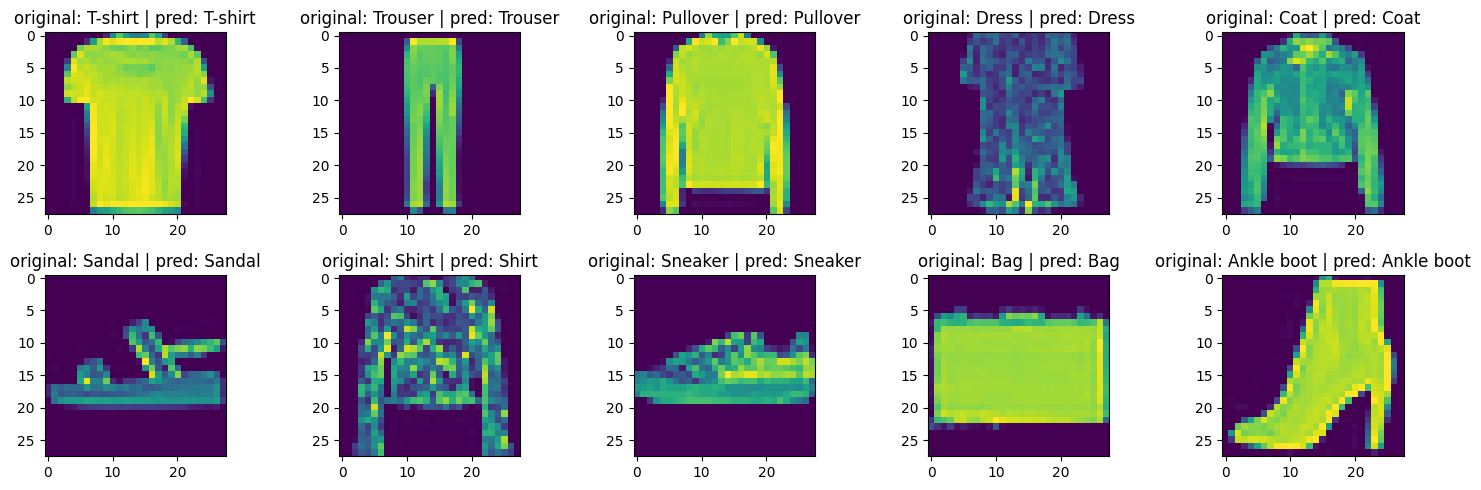

In [ ]:
plt.rcParams['figure.figsize']=(15,5)
plt.rcParams['figure.dpi']=100
for i in digits:
  plt.subplot(2,5, i+1)
  test = x_test[y==i].iloc[0].to_numpy()
  plt.imshow(test.reshape(28,28))

  pred = model.predict(test.reshape(1, 784, ))
  idx = np.argmax(pred[0])
  pred_class = categories[idx]

  plt.title('original: {} | pred: {}'.format(categories[i], pred_class))

plt.tight_layout()